In [46]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Set the path to your folder
folder_path = r"C:\Users\navya\Desktop\Interview Exercise\csv Dataset"

# Get the list of CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
print(f"CSV Files: {csv_files}")
print(f"There are {len(csv_files)} CSV files in the folder.")

CSV Files: ['Test6828_23082300069 000895-01 03.csv', 'Test6828_23082300070 000895-01 03.csv', 'Test6828_23082300071 000895-01 03.csv', 'Test6828_23082300072 000895-01 03.csv', 'Test6828_23082300074 000895-01 03.csv', 'Test6828_23082300077 000895-01 03.csv', 'Test6828_23082300078 000895-01 03.csv', 'Test6828_23082300079 000895-01 03.csv', 'Test6828_23082300080 000895-01 03.csv', 'Test6828_23082300081 000895-01 03.csv', 'Test6828_23082300082 000895-01 03.csv', 'Test6828_23082300083 000895-01 03.csv', 'Test6828_23082300084 000895-01 03.csv', 'Test6828_23082300085 000895-01 03.csv', 'Test6828_23082300087 000895-01 03.csv', 'Test6828_23082300089 000895-01 03.csv', 'Test6828_23082300090 000895-01 03.csv', 'Test6828_23082300091 000895-01 03.csv', 'Test6829_23082200038 000895-01 03.csv', 'Test6829_23082200040 000895-01 03.csv', 'Test6829_23082300042 000895-01 03.csv', 'Test6829_23082300044 000895-01 03.csv', 'Test6829_23082300046 000895-01 03.csv', 'Test6829_23082300049 000895-01 03.csv', 'Tes

In [15]:
# Step 3: Initialize an empty list to hold DataFrames
df_list = []

# Step 4: Loop through all CSV files
for index, filename in enumerate(csv_files):
    file_path = os.path.join(folder_path, filename)
    
    # Step 5: Read the CSV file, skipping the first 52 rows for the first file
    if index == 0:
        df = pd.read_csv(file_path, skiprows=51)  # Skip first 52 rows for the first file
    else:
        df = pd.read_csv(file_path, skiprows=52)  # Skip first 52 rows for subsequent files and take from 53rd row
    
    # Append the DataFrame to the list
    df_list.append(df)

# Step 6: Merge all DataFrames into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

# Step 7: Print the first few rows of the merged DataFrame to verify
print("Merged DataFrame:")
print(merged_df.head(5))

Merged DataFrame:
     Test  Cell   Rack Shelf  Position                   Cell ID  Step  \
0  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
1  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
2  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
3  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
4  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   

  Instruction Name  Cycle  Total Time (Seconds)  ...  17  24  \
0             Idle    0.0                  0.01  ... NaN NaN   
1             Idle    0.0                  5.00  ... NaN NaN   
2             Idle    0.0                 10.00  ... NaN NaN   
3             Idle    0.0                 15.00  ... NaN NaN   
4             Idle    0.0                 20.00  ... NaN NaN   

   23082300090 000895-01 03  -1333  18  23  23082300091 000895-01 03  184.8  \
0                       NaN    NaN NaN NaN                       NaN    N

In [39]:
# Specify the directory where you want to save the merged file
merged_csv_path = r"C:\Users\navya\Desktop\Interview Exercise\csv Dataset"

# Create the full path by joining the directory with the file name
merged_file_path = os.path.join(merged_csv_path, "merged_data.csv")

# Save the DataFrame to the full file path
merged_df.to_csv(merged_file_path, index=False)

# Print the saved file path
print(f"Merged CSV file saved at: {merged_file_path}")

Merged CSV file saved at: C:\Users\navya\Desktop\Interview Exercise\csv Dataset\merged_data.csv


In [20]:
 # Step 6: Data Cleaning Process
    # 1. Remove unnecessary metadata rows (if all values in a row are NaN)
df = df.dropna(how='all')


    

In [24]:
df['Charge Capacity (mAh)'] = pd.to_numeric(df['Charge Capacity (mAh)'], errors='coerce')
df['Discharge Capacity (mAh)'] = pd.to_numeric(df['Discharge Capacity (mAh)'], errors='coerce')

In [26]:
# 3. Drop rows with NaN values in the relevant columns
df.dropna(subset=['Charge Capacity (mAh)', 'Discharge Capacity (mAh)'], inplace=True)

In [29]:
#Calculate Capacity =Charge Capacity (mAh) - Discharge Capacity (mAh)
df['capacity'] = df['Charge Capacity (mAh)'] - df['Discharge Capacity (mAh)']

In [30]:
 # Step 8: Append the cleaned DataFrame to the list
df_list.append(df)

In [31]:
# Step 9: Merge all DataFrames into a single DataFrame
merged_df = pd.concat(df_list, ignore_index=True)

In [32]:
# Step 10: Print the first few rows of the merged DataFrame to verify
print("Merged DataFrame after cleaning and processing:")
print(merged_df.head(5))


Merged DataFrame after cleaning and processing:
     Test  Cell   Rack Shelf  Position                   Cell ID  Step  \
0  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
1  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
2  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
3  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   
4  6828.0   1.0  R.D05    S1      22.0  23082300069 000895-01 03   0.0   

  Instruction Name  Cycle  Total Time (Seconds)  ...  24  \
0             Idle    0.0                  0.01  ... NaN   
1             Idle    0.0                  5.00  ... NaN   
2             Idle    0.0                 10.00  ... NaN   
3             Idle    0.0                 15.00  ... NaN   
4             Idle    0.0                 20.00  ... NaN   

   23082300090 000895-01 03  -1333  18  23 23082300091 000895-01 03  184.8  \
0                       NaN    NaN NaN NaN                      NaN 

In [40]:
# Define the directory where you want to save the CSV
merged_csv_dir = r"C:\Users\navya\Desktop\Interview Exercise\csv Dataset"

# Define the full file path with a filename
merged_csv_path = os.path.join(merged_csv_dir, "merged_data1.csv")

# Save the DataFrame to the specified file path
merged_df.to_csv(merged_csv_path, index=False)

# Print the path where the file was saved
print(f"Merged CSV file saved at: {merged_csv_path}")

Merged CSV file saved at: C:\Users\navya\Desktop\Interview Exercise\csv Dataset\merged_data1.csv


In [42]:
max_capacity_index = merged_df['capacity'].idxmax()
max_capacity_row = merged_df.loc[max_capacity_index]
# Print details of the row with the highest capacity
print("\nCell with the highest capacity:")
print(max_capacity_row)


Cell with the highest capacity:
Test                         6829.0
Cell                           19.0
Rack                          R.D05
Shelf                            S2
Position                        1.0
                             ...   
23082300091 000895-01 03        NaN
184.8                           NaN
-1343                           NaN
183.6                           NaN
capacity                    25154.0
Name: 357388, Length: 169, dtype: object


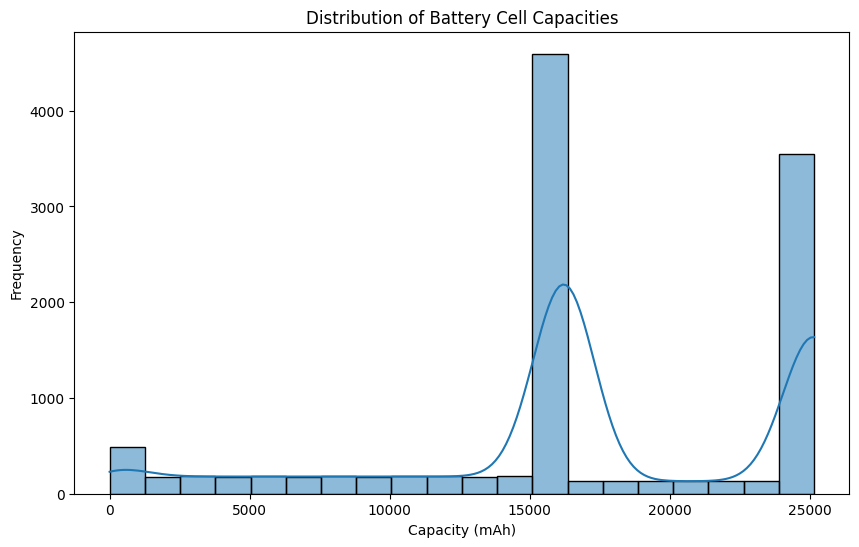

In [48]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram with KDE (Kernel Density Estimation)
sns.histplot(df['Charge Capacity (mAh)'], bins=20, kde=True)

# Label axes and add title
plt.xlabel('Capacity (mAh)')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Cell Capacities')

# Show the plot
plt.show()

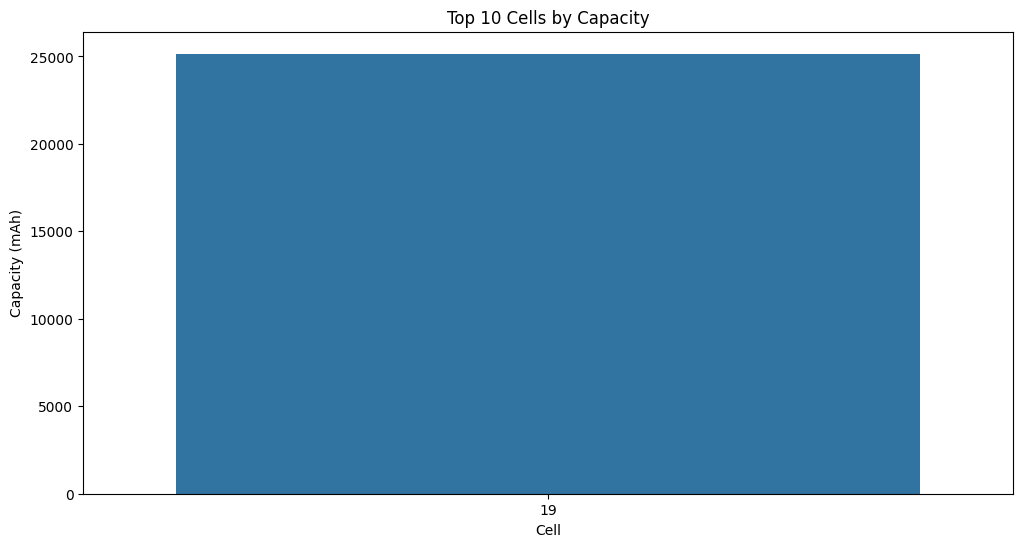

In [53]:
# Select the top 10 cells with the highest capacity
top_10_cells = df.nlargest(10, 'Charge Capacity (mAh)')

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=top_10_cells['Cell'], y=top_10_cells['Charge Capacity (mAh)'])

# Label axes and add title
plt.xlabel('Cell')
plt.ylabel('Capacity (mAh)')
plt.title('Top 10 Cells by Capacity')

# Show the plot
plt.show()